# 0. Setup

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import spearmanr

In [3]:
corp_time_df = pd.read_csv("data/Corp Ownership and Occupancy Over Time.csv")
zip_neighbor_df = pd.read_csv("data/Boston_Neighborhoods_Zipcodes.csv")
census_corp_time_df = pd.read_csv("data/Census + Corp Ownership and Occupancy Over Time.csv")

In [4]:
(corp_time_df.equals(census_corp_time_df[['Neighborhood', 'Year', 'own_occ_rate', 'corp_own_rate']]), 
 census_corp_time_df[['Neighborhood', 'Year', 'own_occ_rate', 'corp_own_rate']].equals(corp_time_df))

(True, True)

In [5]:
census_corp_time_df.head()

,Neighborhood,Year,own_occ_rate,corp_own_rate,college,tot_pop_18plus,two_or_more_0_17,aapi_0_17,tot_pop_all,other_18plus,...,tot_pop_0_17,aian_all,tot_gq_pop,occ_unit,aapi_18plus,juvenile,other_all,hisp_all,black_18plus,objectid
0,Allston,2004,0.29,0.07,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
1,Allston,2005,0.30,0.07,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
2,Allston,2006,0.29,0.08,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
3,Allston,2007,0.31,0.08,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1
4,Allston,2008,0.31,0.09,3214,26668,179,353,28621,273,...,1953,27,3390,11740,6820,0,330,3657,1294,1


In [6]:
corp_time_df.head()

,Neighborhood,Year,own_occ_rate,corp_own_rate
0,Allston,2004,0.29,0.07
1,Allston,2005,0.30,0.07
2,Allston,2006,0.29,0.08
3,Allston,2007,0.31,0.08
4,Allston,2008,0.31,0.09


In [7]:
([hood for hood in census_corp_time_df['Neighborhood'].unique() if hood not in set(zip_neighbor_df['Neighborhood'])],
 [hood for hood in corp_time_df['Neighborhood'].unique() if hood not in set(zip_neighbor_df['Neighborhood'])])

(['Fenway', 'North End', 'West End'], ['Fenway', 'North End', 'West End'])

In [8]:
# Add missing neighborhoods
add_missing_df = pd.DataFrame([(2215, "Fenway"), (2113, "North End"), (2113, "West End")], 
                              columns=['Zip Code', 'Neighborhood'])
full_zip_neighbor_df = pd.concat([zip_neighbor_df, add_missing_df]).reset_index(drop=True)
full_zip_neighbor_df.to_csv("data/full_zip_map.csv", index=None)

In [9]:
census_corp_time_df['Neighborhood'].unique()

array(['Allston', 'Beacon Hill', 'Brighton', 'Downtown', 'Charlestown',
       'Chinatown', 'Dorchester', 'East Boston', 'Fenway', 'Hyde Park',
       'Jamaica Plain', 'Longwood', 'Mattapan', 'North End', 'Roslindale',
       'Roxbury', 'South Boston', 'South Boston Waterfront', 'South End',
       'West End', 'West Roxbury'], dtype=object)

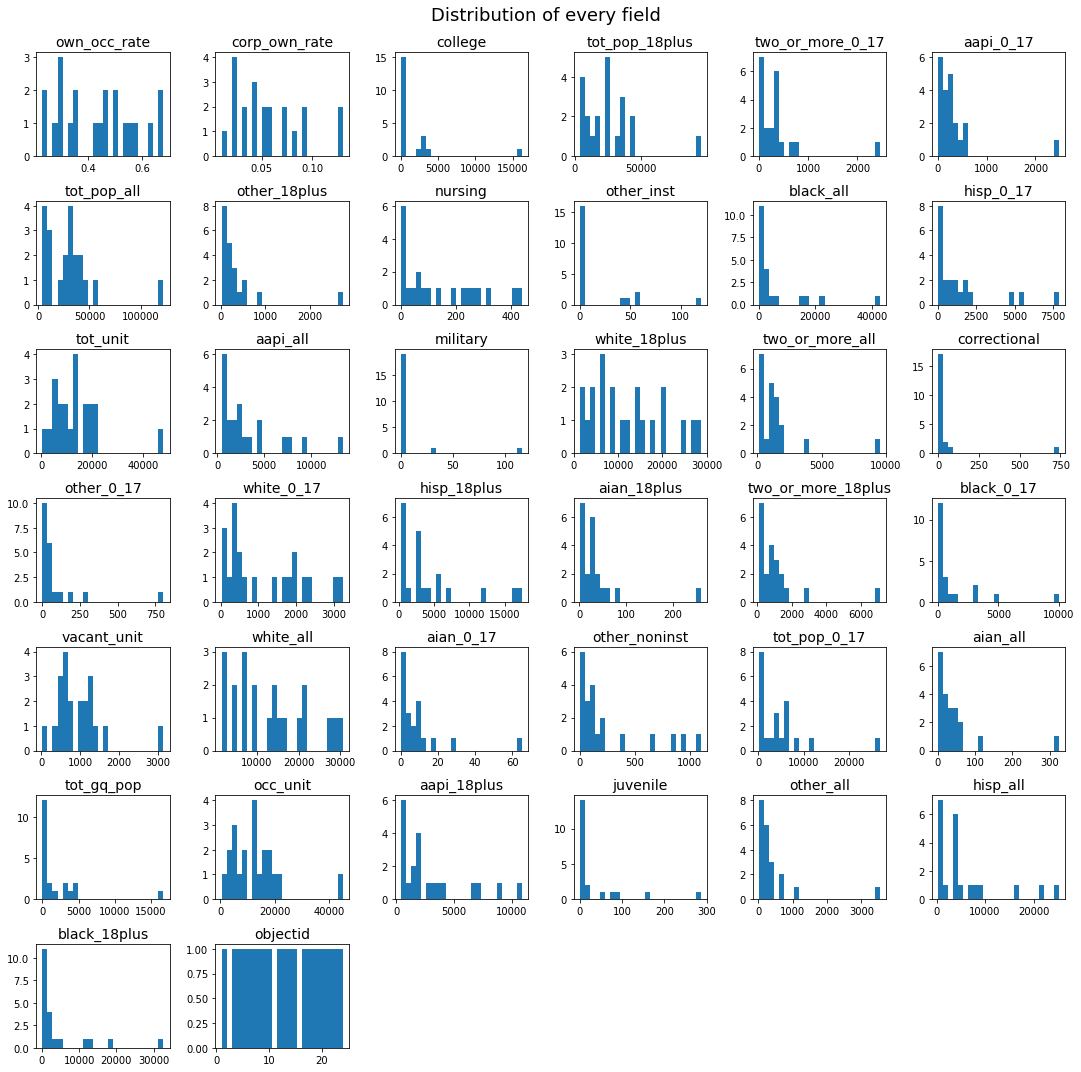

In [209]:
f, ax = plt.subplots(7, 6, figsize=(15,15))
ax_idx = 0
ax = ax.ravel()
for col in census_corp_time_df.columns:
    if col in ['Neighborhood', 'Year']:
        continue
    census_corp_time_df.drop_duplicates(subset=['Neighborhood'])[col].hist(ax=ax[ax_idx], bins=24)
    ax[ax_idx].grid(visible=False)
    ax[ax_idx].set_title(col, size=14)
    ax_idx += 1
for idx in range(ax_idx, 7*6):
    ax[idx].remove()
f.suptitle("Distribution of every field", size=18, y=0.99)
f.tight_layout()
f.savefig("figures/field_distributions.pdf")
f.savefig("figures/field_distributions.jpeg")

In [193]:
census_corp_time_df[census_corp_time_df['juvenile']>0]['Neighborhood'].unique()

array(['Brighton', 'Dorchester', 'East Boston', 'Jamaica Plain',
       'Mattapan', 'Roslindale', 'Roxbury', 'South Boston'], dtype=object)

In [188]:
census_corp_time_df[census_corp_time_df['black_all']>40000]['Neighborhood'].unique()

array(['Dorchester'], dtype=object)

In [191]:
census_corp_time_df[census_corp_time_df['college']>10000]

,Neighborhood,Year,own_occ_rate,corp_own_rate,college,tot_pop_18plus,two_or_more_0_17,aapi_0_17,tot_pop_all,other_18plus,...,tot_pop_0_17,aian_all,tot_gq_pop,occ_unit,aapi_18plus,juvenile,other_all,hisp_all,black_18plus,objectid
168,Fenway,2004,0.23,0.09,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
169,Fenway,2005,0.24,0.13,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
170,Fenway,2006,0.23,0.13,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
171,Fenway,2007,0.24,0.13,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
172,Fenway,2008,0.23,0.15,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
173,Fenway,2009,0.23,0.15,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
174,Fenway,2010,0.23,0.16,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
175,Fenway,2011,0.22,0.16,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
176,Fenway,2012,0.21,0.15,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10
177,Fenway,2013,0.21,0.16,16197,36715,99,197,37733,365,...,1018,40,16720,12661,9021,0,388,3643,2281,10


In [103]:
census_corp_time_df.groupby(['objectid']).apply(lambda x: x['Neighborhood'].unique()).explode().sort_values()

objectid
1                     Allston
3                 Beacon Hill
4                    Brighton
5                 Charlestown
6                   Chinatown
7                  Dorchester
8                    Downtown
9                 East Boston
10                     Fenway
12                  Hyde Park
13              Jamaica Plain
14                   Longwood
15                   Mattapan
17                  North End
18                 Roslindale
19                    Roxbury
20               South Boston
21    South Boston Waterfront
22                  South End
23                   West End
24               West Roxbury
dtype: object

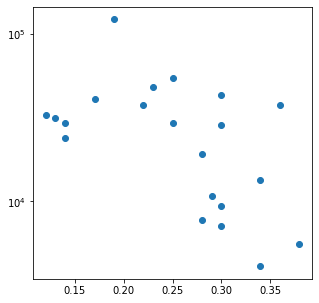

In [204]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
ax.scatter(census_corp_time_df[census_corp_time_df['Year']==2024]['corp_own_rate'],
           census_corp_time_df[census_corp_time_df['Year']==2024]['tot_pop_all'])
ax.set_yscale("symlog")

In [10]:
def get_delta(df, colname):
    df['delta_'+colname] = [np.nan] + list(df[colname].iloc[1:].values - df[colname].iloc[:-1].values)
    return df
census_corp_time_df = census_corp_time_df.groupby('Neighborhood', as_index=False).apply(
    lambda x: get_delta(x.sort_values('Year'), 'own_occ_rate')).reset_index(drop=True)
census_corp_time_df = census_corp_time_df.groupby('Neighborhood', as_index=False).apply(
    lambda x: get_delta(x.sort_values('Year'), 'corp_own_rate')).reset_index(drop=True)

In [11]:
census_corp_time_df['total_delta_own_occ_rate'] = census_corp_time_df.apply(
    lambda x: np.nan if x['Year']!=2024 else 
    x['own_occ_rate'] - census_corp_time_df[(census_corp_time_df['Neighborhood']==x['Neighborhood']) &
                                            (census_corp_time_df['Year']==2004)].iloc[0]['own_occ_rate'], 1)
census_corp_time_df['total_delta_corp_own_rate'] = census_corp_time_df.apply(
    lambda x: np.nan if x['Year']!=2024 else 
    x['corp_own_rate'] - census_corp_time_df[(census_corp_time_df['Neighborhood']==x['Neighborhood']) &
                                            (census_corp_time_df['Year']==2004)].iloc[0]['corp_own_rate'], 1)
census_corp_time_df.to_csv("data/census_corp_own_occ_time.csv")

In [19]:
# Compute standard deviation of corporate ownership rates across years
census_corp_time_df.groupby('Year').apply(lambda x: x['corp_own_rate'].std())

Year
2004    0.034441
2005    0.036279
2006    0.035010
2007    0.039194
2008    0.037632
2009    0.036233
2010    0.049121
2011    0.044374
2012    0.036917
2013    0.037569
2014    0.037499
2015    0.041306
2016    0.044599
2017    0.049140
2018    0.050332
2019    0.054824
2020    0.065152
2021    0.072519
2022    0.079570
2023    0.076020
2024    0.079129
dtype: float64

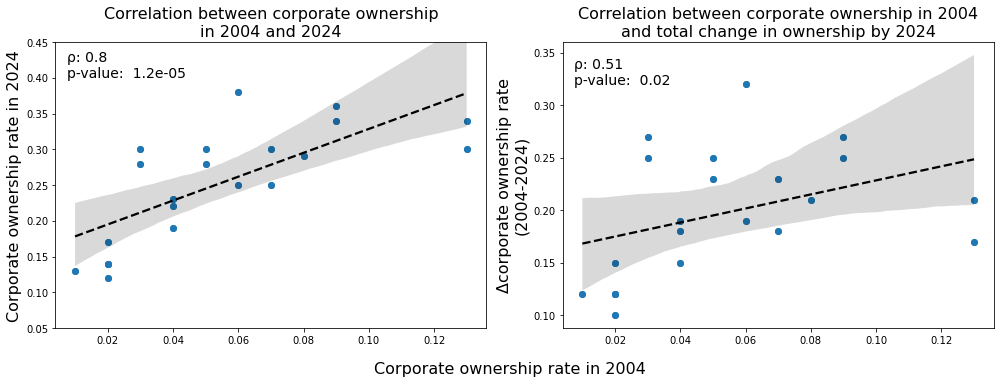

In [108]:
f, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].scatter(census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
              census_corp_time_df[census_corp_time_df['Year']==2024].set_index('Neighborhood')['corp_own_rate'])
sns.regplot(x=census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
            y=census_corp_time_df[census_corp_time_df['Year']==2024].set_index('Neighborhood')['corp_own_rate'],
            ci=95, line_kws={'color':'black', 'linestyle':'dashed'}, ax=ax[0])
ax[1].scatter(census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
              census_corp_time_df[census_corp_time_df['Year']==2024].set_index('Neighborhood')['total_delta_corp_own_rate'])
sns.regplot(x=census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
            y=census_corp_time_df[census_corp_time_df['Year']==2024].set_index('Neighborhood')['total_delta_corp_own_rate'],
            ci=95, line_kws={'color':'black', 'linestyle':'dashed'}, ax=ax[1])
ax[0].set_ylim((0.05, 0.45))
corp_own_rho, corp_own_pval = spearmanr(census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
                                        census_corp_time_df[census_corp_time_df['Year']==2024].set_index('Neighborhood')['corp_own_rate'])
delta_rho, delta_pval = spearmanr(census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
                                  census_corp_time_df[census_corp_time_df['Year']==2024].set_index('Neighborhood')['total_delta_corp_own_rate'])
ax[0].text(s=f"ρ: {round(corp_own_rho, 2)}\np-value: {corp_own_pval: .1e}", x=0.0075, y=0.4, size=14)
ax[1].text(s=f"ρ: {round(delta_rho, 2)}\np-value: {delta_pval: .1}", x=0.0075, y=0.32, size=14)
f.text(s="Corporate ownership rate in 2004", size=16, y=-0.05, x=0.375)
ax[0].set_ylabel("Corporate ownership rate in 2024", size=16)
ax[1].set_ylabel("Δcorporate ownership rate\n(2004-2024)", size=16)
ax[0].set_title("Correlation between corporate ownership\nin 2004 and 2024", size=16)
ax[1].set_title("Correlation between corporate ownership in 2004\nand total change in ownership by 2024", size=16)
ax[0].set_xlabel("")
ax[1].set_xlabel("")
f.tight_layout()
f.savefig("images/corp_own_start_end_correlation.jpeg")

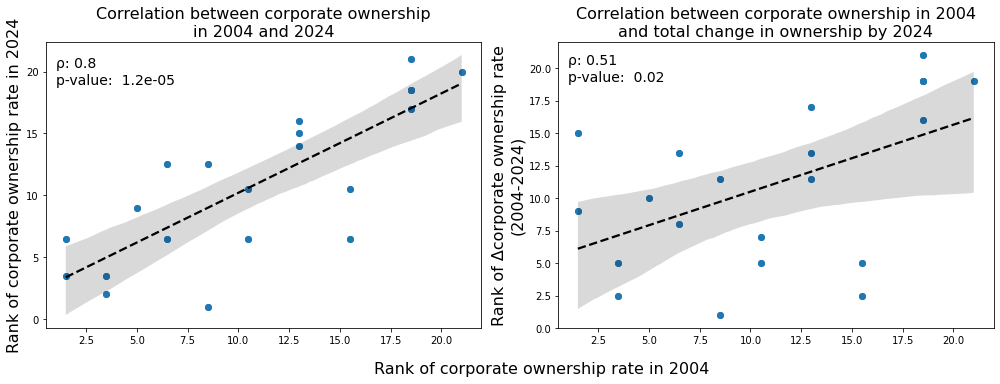

In [136]:
# Same figure as above but converting all axes to ranks
f, ax = plt.subplots(1, 2, figsize=(14,5))
corp_own_rank_2004_s = census_corp_time_df[census_corp_time_df['Year']==2004
                                          ].set_index('Neighborhood')['corp_own_rate'].rank(ascending=False)
corp_own_rank_2024_s = census_corp_time_df[census_corp_time_df['Year']==2024
                                          ].set_index('Neighborhood')['corp_own_rate'].rank(ascending=False)
delta_rank_s = census_corp_time_df[census_corp_time_df['Year']==2024
                                  ].set_index('Neighborhood')['total_delta_corp_own_rate'].rank(ascending=False)


ax[0].scatter(corp_own_rank_2004_s, corp_own_rank_2024_s)
sns.regplot(x=corp_own_rank_2004_s, y=corp_own_rank_2024_s, ci=95, 
            line_kws={'color':'black', 'linestyle':'dashed'}, ax=ax[0])
ax[1].scatter(corp_own_rank_2004_s, delta_rank_s)
sns.regplot(x=corp_own_rank_2004_s, y=delta_rank_s, ci=95,
            line_kws={'color':'black', 'linestyle':'dashed'}, ax=ax[1])
corp_own_rho, corp_own_pval = spearmanr(census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
                                        census_corp_time_df[census_corp_time_df['Year']==2024].set_index('Neighborhood')['corp_own_rate'])
delta_rho, delta_pval = spearmanr(census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
                                  census_corp_time_df[census_corp_time_df['Year']==2024].set_index('Neighborhood')['total_delta_corp_own_rate'])

ax[0].text(s=f"ρ: {round(corp_own_rho, 2)}\np-value: {corp_own_pval: .1e}", x=1, y=19, size=14)
ax[1].text(s=f"ρ: {round(delta_rho, 2)}\np-value: {delta_pval: .1}", x=1, y=19, size=14)
f.text(s="Rank of corporate ownership rate in 2004", size=16, y=-0.05, x=0.375)
ax[0].set_ylabel("Rank of corporate ownership rate in 2024", size=16)
ax[1].set_ylabel("Rank of Δcorporate ownership rate\n(2004-2024)", size=16)
ax[0].set_title("Correlation between corporate ownership\nin 2004 and 2024", size=16)
ax[1].set_title("Correlation between corporate ownership in 2004\nand total change in ownership by 2024", size=16)
ax[0].set_xlabel("")
ax[1].set_xlabel("")
f.tight_layout()
f.savefig("images/corp_own_start_end_rank_correlation.jpeg")

In [225]:
corp_own_rank_2004_s.drop('South Boston Waterfront')

Neighborhood
Allston           6.5
Beacon Hill      10.5
Brighton         13.0
Charlestown      15.5
Chinatown         1.5
Dorchester       13.0
Downtown          1.5
East Boston      15.5
Fenway            3.5
Hyde Park        18.5
Jamaica Plain    18.5
Longwood          3.5
Mattapan         18.5
North End         5.0
Roslindale       18.5
Roxbury           6.5
South Boston     13.0
South End         8.5
West End         10.5
West Roxbury     21.0
Name: corp_own_rate, dtype: float64

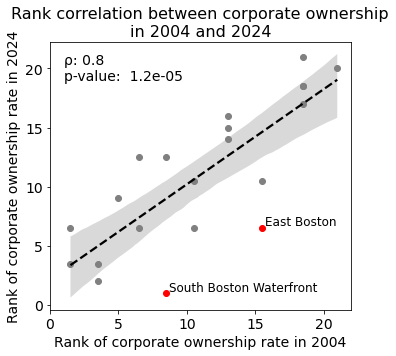

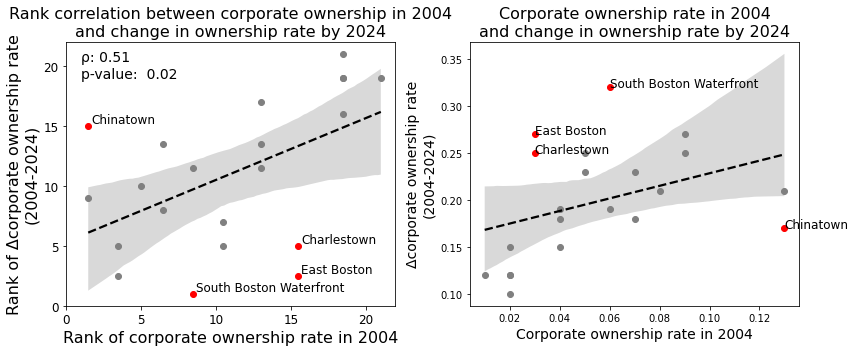

In [256]:
f, ax = plt.subplots(1, 1, figsize=(5,5))
corp_own_rank_2004_s = census_corp_time_df[census_corp_time_df['Year']==2004
                                          ].set_index('Neighborhood')['corp_own_rate'].rank(ascending=False)
corp_own_rank_2024_s = census_corp_time_df[census_corp_time_df['Year']==2024
                                          ].set_index('Neighborhood')['corp_own_rate'].rank(ascending=False)
sns.regplot(x=corp_own_rank_2004_s, y=corp_own_rank_2024_s, ci=95, 
            line_kws={'color':'black', 'linestyle':'dashed'}, ax=ax, scatter_kws={'alpha':0})
ax.scatter(corp_own_rank_2004_s.drop(["South Boston Waterfront", "East Boston"]), 
           corp_own_rank_2024_s.drop(["South Boston Waterfront", "East Boston"]),
           c='grey')
ax.scatter(corp_own_rank_2004_s.loc[["South Boston Waterfront", "East Boston"]], 
           corp_own_rank_2024_s.loc[["South Boston Waterfront", "East Boston"]],
           c='red')
ax.text(corp_own_rank_2004_s.loc["South Boston Waterfront"]+0.2, 
        corp_own_rank_2024_s.loc["South Boston Waterfront"]+0.2, 
        'South Boston Waterfront', size=12)
ax.text(corp_own_rank_2004_s.loc["East Boston"]+0.2, 
        corp_own_rank_2024_s.loc["East Boston"]+0.2, 
        'East Boston', size=12)
corp_own_rho, corp_own_pval = spearmanr(census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
                                        census_corp_time_df[census_corp_time_df['Year']==2024].set_index('Neighborhood')['corp_own_rate'])
ax.text(s=f"ρ: {round(corp_own_rho, 2)}\np-value: {corp_own_pval: .1e}", x=1, y=19, size=14)
ax.set_ylabel("Rank of corporate ownership rate in 2024", size=14)
ax.set_title("Rank correlation between corporate ownership\nin 2004 and 2024", size=16)
ax.set_xlabel("Rank of corporate ownership rate in 2004", size=14)
f.tight_layout()
ax.set_xticks(range(22)[::5])
ax.set_yticks(range(22)[::5])
ax.tick_params(axis='both', which='major', labelsize=14)
f.savefig("images/corp_own_start_end_rank_correlation.svg")

# Delta ownership rate
f, ax = plt.subplots(1, 2, figsize=(12,5))
corp_own_2004_s = census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate']
delta_rank_s = census_corp_time_df[census_corp_time_df['Year']==2024
                                  ].set_index('Neighborhood')['total_delta_corp_own_rate'].rank(ascending=False)
delta_s =  census_corp_time_df[census_corp_time_df['Year']==2024
                              ].set_index('Neighborhood')['total_delta_corp_own_rate']
sns.regplot(x=corp_own_rank_2004_s, y=delta_rank_s, ci=95,
            line_kws={'color':'black', 'linestyle':'dashed'}, ax=ax[0], scatter_kws={'alpha':0})
sns.regplot(x=corp_own_2004_s,
            y=delta_s,
            ci=95, line_kws={'color':'black', 'linestyle':'dashed'}, ax=ax[1], scatter_kws={'alpha':0})

highlight_l = ["South Boston Waterfront", "Chinatown", "Charlestown", "East Boston"]
ax[0].scatter(corp_own_rank_2004_s.drop(highlight_l), 
              delta_rank_s.drop(highlight_l),
              c='grey')
ax[0].scatter(corp_own_rank_2004_s.loc[highlight_l], 
              delta_rank_s.loc[highlight_l],
              c='red')
for neighborhood in highlight_l:
    ax[0].text(corp_own_rank_2004_s.loc[neighborhood]+0.2, 
               delta_rank_s.loc[neighborhood]+0.2, 
               neighborhood, size=12)
delta_rho, delta_pval = spearmanr(census_corp_time_df[census_corp_time_df['Year']==2004].set_index('Neighborhood')['corp_own_rate'],
                                  delta_s)

ax[1].scatter(corp_own_2004_s.drop(highlight_l), 
              delta_s.drop(highlight_l),
              c='grey')
ax[1].scatter(corp_own_2004_s.loc[highlight_l], 
              delta_s.loc[highlight_l],
              c='red')
for neighborhood in highlight_l:
    ax[1].text(corp_own_2004_s.loc[neighborhood], 
               delta_s.loc[neighborhood], 
               neighborhood, size=12)

ax[0].text(s=f"ρ: {round(delta_rho, 2)}\np-value: {delta_pval: .1}", x=1, y=19, size=14)
ax[0].set_ylabel("Rank of Δcorporate ownership rate\n(2004-2024)", size=16)
ax[0].set_title("Rank correlation between corporate ownership in 2004\nand change in ownership rate by 2024", size=16)
ax[1].set_title("Corporate ownership rate in 2004\nand change in ownership rate by 2024", size=16)
ax[0].set_xlabel("Rank of corporate ownership rate in 2004", size=16)
ax[0].set_xticks(range(22)[::5])
ax[0].set_yticks(range(22)[::5])
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].set_ylabel("Δcorporate ownership rate\n(2004-2024)", size=14)
ax[1].set_xlabel("Corporate ownership rate in 2004", size=14)
f.tight_layout()
f.savefig("images/delta_corp_own_start_end_rank_correlation.svg")

In [260]:
corp_own_rank_2004_s.sort_values(), corp_own_rank_2024_s.sort_values()

(Neighborhood
 Chinatown                   1.5
 Downtown                    1.5
 Fenway                      3.5
 Longwood                    3.5
 North End                   5.0
 Allston                     6.5
 Roxbury                     6.5
 South End                   8.5
 South Boston Waterfront     8.5
 Beacon Hill                10.5
 West End                   10.5
 Brighton                   13.0
 Dorchester                 13.0
 South Boston               13.0
 Charlestown                15.5
 East Boston                15.5
 Jamaica Plain              18.5
 Mattapan                   18.5
 Hyde Park                  18.5
 Roslindale                 18.5
 West Roxbury               21.0
 Name: corp_own_rate, dtype: float64,
 Neighborhood
 South Boston Waterfront     1.0
 Fenway                      2.0
 Downtown                    3.5
 Longwood                    3.5
 Allston                     6.5
 Beacon Hill                 6.5
 Chinatown                   6.5
 East Bost

In [202]:
census_corp_time_df['delta_corp_own_rate']

0       NaN
1      0.00
2      0.01
3      0.00
4      0.01
       ... 
436    0.02
437    0.02
438    0.00
439    0.02
440    0.02
Name: delta_corp_own_rate, Length: 441, dtype: float64

In [196]:
census_corp_time_df[census_corp_time_df['Neighborhood']=='Fenway']['own_occ_rate'].median()

0.21

In [193]:
full_zip_neighbor_df[full_zip_neighbor_df['Zip Code']==2215]

,Zip Code,Neighborhood
10,2215,Downtown
35,2215,Fenway


In [214]:
census_corp_time_df[census_corp_time_df['Year']==2004]['own_occ_rate'].map(lambda x: 1-x).std(), census_corp_time_df[census_corp_time_df['Year']==2024]['own_occ_rate'].map(lambda x: 1-x).std()

(0.1409812550863209, 0.15134319246256803)